# Scales, resolutions, zoom and tilegrid

In [6]:
import numpy as np

# LAT = 0        # radians
LAT = 47*np.pi/180  # radians
R = 6378137    # meters
C = 2*np.pi*R  # meters
TILE_WIDTH_PX = 256
# RESOLUTIONS ?= '[650.0, 500.0, 250.0, 100.0, 50.0, 20.0, 10.0, 5.0, 2.5, 2.0, 1.0, 0.5, 0.25, 0.1]'
# TILEGRID_RESOLUTIONS ?= '[4000, 3750, 3500, 3250, 3000, 2750, 2500, 2250, 2000, 1750, 1500, 1250, 1000, 750, 650, 500, 250, 100, 50, 20, 10, 5, 2.5, 2, 1.5, 1, 0.5, 0.25, 0.1]'

The horizontal distance represented by each square tile, measured along the parallel at a given latitude, is given by (see. [1]):
\begin{equation}
    S_{tile} = C \times \cos(latitude) / 2^{zoomlevel}
\end{equation}

where C means the equatorial circumference of the Earth (40 075 016.686 m ≈ 2π ∙ 6 378 137.000 {R} m for the reference geoid used by OpenStreetMap).

As tiles are 256-pixels wide, the horizontal distance represented by one pixel is:
\begin{equation}
    S_{pixel} = S_{tile} / 256 = C \times \cos(latitude) / 2^{(zoomlevel + 8)}
\end{equation}
For example on the equator and at zoom level 0, we get 40 075 016.686 / 256 ≈ 156 543.03 (in meters per pixel).


Exact length of the equator (according to wikipedia) is 40075016.686 m in WGS-84. At zoom 0, one pixel would equal 156543.03 meters (assuming a tile size of 256 px): 
40075016.686 / 256 ≈ 6378137.0 * 2 * pi / 256 ≈ 156543.03 m/px

Which gives us a formula to calculate resolution at any given zoom:

resolution = 156543.03 meters/pixel * cos(latitude) / (2 ^ zoomlevel)

[1] https://wiki.openstreetmap.org/wiki/Zoom_levels

In [7]:
def resolution(LAT, zoomlevel):
    S_tile = C * np.cos(LAT)/(np.power(2,zoomlevel))
    S_pixel = S_tile/TILE_WIDTH_PX  # meters/pixel
    return S_pixel, S_tile
# R_0 = R * 2 * np.pi / TILE_WIDTH_PX
# S_p  = R_0 * np.cos(LAT)/np.power(2,0)
# print(R_0)
# print(S_p)

for zoom in range(0,21):
    print(zoom, resolution(LAT, zoom), resolution(0, zoom))

0 (106762.092418132, 27331095.659041792) (156543.03392804097, 40075016.68557849)
1 (53381.046209066, 13665547.829520896) (78271.51696402048, 20037508.342789244)
2 (26690.523104533, 6832773.914760448) (39135.75848201024, 10018754.171394622)
3 (13345.2615522665, 3416386.957380224) (19567.87924100512, 5009377.085697311)
4 (6672.63077613325, 1708193.478690112) (9783.93962050256, 2504688.5428486555)
5 (3336.315388066625, 854096.739345056) (4891.96981025128, 1252344.2714243277)
6 (1668.1576940333125, 427048.369672528) (2445.98490512564, 626172.1357121639)
7 (834.0788470166563, 213524.184836264) (1222.99245256282, 313086.06785608194)
8 (417.0394235083281, 106762.092418132) (611.49622628141, 156543.03392804097)
9 (208.51971175416406, 53381.046209066) (305.748113140705, 78271.51696402048)
10 (104.25985587708203, 26690.523104533) (152.8740565703525, 39135.75848201024)
11 (52.129927938541016, 13345.2615522665) (76.43702828517625, 19567.87924100512)
12 (26.064963969270508, 6672.63077613325) (38.21

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1.024e+06 9.600e+05 8.960e+05 8.320e+05 7.680e+05 7.040e+05 6.400e+05
 5.760e+05 5.120e+05 4.480e+05 3.840e+05 3.200e+05 2.560e+05 1.920e+05
 1.664e+05 1.280e+05 6.400e+04 2.560e+04 1.280e+04 5.120e+03 2.560e+03
 1.280e+03 6.400e+02 5.120e+02 3.840e+02 2.560e+02 1.280e+02 6.400e+01
 2.560e+01]
fetching https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/2056/19/46/30.jpeg
fetching https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/13/4283/2884.jpeg


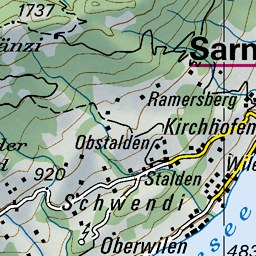

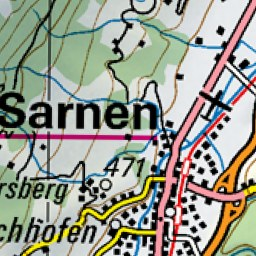

In [20]:
# in lv95 at resolution 1 m/px the tile size is 256 m and this is defined as map zoom 10 and corresponds to wmts zoom level 25
LV95_RESOLUTIONS = [
    4000.0, 3750.0, 3500.0, 3250.0,
    3000.0, 2750.0, 2500.0, 2250.0,
    2000.0, 1750.0, 1500.0, 1250.0,
    1000.0, 750.0, 650.0, 500.0,
    250.0, 100.0, 50.0, 20.0, 10.0,
    5.0, 2.5, 2.0, 1.5, 1.0, 0.5,
    0.25, 0.1
] # m/px
LV95_ZOOM_LEVELS = list(range(0, len(LV95_RESOLUTIONS)))
LV95_APP_RESOLUTIONS = [650.0, 500.0, 250.0, 100.0, 50.0, 20.0, 10.0, 5.0, 2.5, 2.0, 1.0, 0.5, 0.25, 0.1]
LV95_APP_ZOOM_LEVELS = list(range(0, len(LV95_APP_RESOLUTIONS)))
print(LV95_ZOOM_LEVELS)
print(LV95_APP_ZOOM_LEVELS)
LV95_TILE_WIDTH_RATIO = 4000/1024000
LV95_TILE_WIDTH = np.array(LV95_RESOLUTIONS)/LV95_TILE_WIDTH_RATIO
print(LV95_TILE_WIDTH)
# https://tod.dev.bgdi.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/13/4283/2884.jpeg
# https://wmts100.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/2056/19/46/30.jpeg
# https://wmts100.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/2056/19/47/30.jpeg
from IPython.core.display import Image, display
from owslib.wmts import openURL, WebMapTileService
layer = 'ch.swisstopo.pixelkarte-farbe'
username = 'user_brl6a'
pw = '58wbytpjt1a2gz4m'
wmts = WebMapTileService('https://wmts.geo.admin.ch/EPSG/2056/1.0.0/WMTSCapabilities.xml', username=username, password=pw)
## NOTE2: row and col are switched between 2056 and 21781
url = wmts.buildTileResource(layer=layer,
                    style='default',
                    tilematrixset='2056',
                    tilematrix='19',
                    column='46',         
                    row='30',
                    format="image/jpeg"
                )
url2 = wmts.buildTileResource(layer=layer,
                    style='default',
                    tilematrixset='3857',
                    tilematrix='13',
                    column='4283',         
                    row='2884',
                    format="image/jpeg"
                )
# Note: this url still contains the parameter '{Time}'
# that has to be replaced with 'current'
resurl = url.replace('{Time}', 'current')
resurl2 = url2.replace('{Time}', 'current')
resurl2 = resurl2.replace('2056', '3857')

print("fetching {}".format(resurl))
print("fetching {}".format(resurl2))

tile = openURL(resurl, username=username, password=pw)
tile2 = openURL(resurl2, username=username, password=pw)

display(Image(data=tile.read(), format='jpg', unconfined=True))
display(Image(data=tile2.read(), format='jpg', unconfined=True))